# Tratamiento de datos GeoEspaciales con GeoJSON en Python

Los datos geoespaciales se utilizan en aplicaciones de mapas, análisis territorial y sistemas de información geográfica (SIG). Uno de los formatos más comunes es GeoJSON, que almacena información geográfica como puntos, líneas y polígonos.


A continuación, aprenderemos a:

-> Leer un archivo GeoJSON

-> Extraer y visualizar los datos

-> Manipular y guardar información adicional

In [1]:
# Comenzaremos instalando la librería necesaria
%pip install geojson geopandas matplotlib


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 882.6 kB/s eta 0:00:18
   - -------------------------------------- 0.5/16.2 MB 882.6 kB/s eta 0:00:18
   - -------------------------------------- 0.8/16.2 MB 780.2 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/16.2 MB 915.5 kB/s eta 0:00:17
   --- ------------------------------------ 1.6/16.2 MB 1.1 MB/s eta 0:00:14
   ----- ---------------------------------- 2.1/16.2 MB 1.3 MB/s eta 0:00:11
   ------ --------------------------------- 2.6/16.2 MB 1.5 MB/s eta 0:00:10
   ------- -------------------------------- 3.1/16.2 MB 1.6 MB/s eta 0:00:09
   --------- ------------------------------ 3.7/16.2 MB 1.7 MB/s eta 0:00:08
   --------- ------------------------------ 3.9/16.2 MB 1.7 MB/s eta 0:00:08
   --------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Vamos a cargar un archivo GeoJSON con datos de ubicaciones y explorarlo.

En el ejemplo: puntos.geojson encontramos:

{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"nombre": "Punto A"},
            "geometry": {
                "type": "Point",
                "coordinates": [-3.7038, 40.4168]
            }
        },
        {
            "type": "Feature",
            "properties": {"nombre": "Punto B"},
            "geometry": {
                "type": "Point",
                "coordinates": [-0.3763, 39.4699]
            }
        }
    ]
}

Este formato es un estándar ampliamente utilizado en aplicaciones de mapas y datos geoespaciales. Se basa en JSON y es compatible con herramientas como Leaflet, Mapbox, QGIS, GeoServer, GeoPandas y Folium.

--> En los requisitos de trabajo de GeoAITech, podemos ver que utilizan GeoJSON, QGIS y MapBox.

Desglose de la estructura:

1) type: "FeatureCollection". Define que el documento contiene múltiples entidades geográficas.
2) features: contiene una lista de elementos geográficos, cada elemento es una Feature o Entidad con propiedades y geometría.
3) Feature: type -> Especifica que es una entidad geográfica individual; properties -> Contiene atributos adicionales no espaciales; geometry -> define la longitud y latitud en formato de goordnadas "WGS84, usado en la mayoría de mapas en línea.
4) Geometry: type:"Point" -> indica que la geometría es un punto (podría ser un área); coordiantes -> Define la longitud y latitud.

# 1. Importar GeoJSON y Cargar Archivo

In [2]:
import geojson

with open("punto.geojson", "r", encoding="utf-8") as f:
    datos = geojson.load(f)
    
print(datos)

{"features": [{"geometry": {"coordinates": [-3.7038, 40.4168], "type": "Point"}, "properties": {"nombre": "Punto A"}, "type": "Feature"}, {"geometry": {"coordinates": [-0.3763, 39.4699], "type": "Point"}, "properties": {"nombre": "Punto B"}, "type": "Feature"}], "type": "FeatureCollection"}


# 2 Leer GeoJSON con GeoPandas

In [3]:
import geopandas as gpd

gdf = gpd.read_file("punto.geojson")

print(gdf.head())

    nombre                 geometry
0  Punto A  POINT (-3.7038 40.4168)
1  Punto B  POINT (-0.3763 39.4699)


# 3 Visualizar Datos en una Gráfica

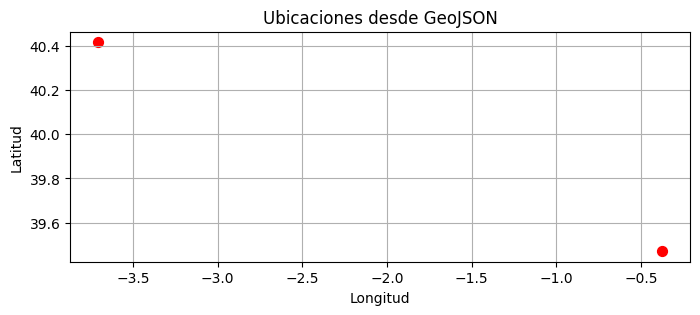

In [4]:
import matplotlib.pyplot as plt

gdf.plot(marker='o', color = 'red', markersize = 50, figsize=(8,6))

plt.title("Ubicaciones desde GeoJSON")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)

plt.show()



# 4 Filtrar y Manipular Datos

In [5]:
# Obtener nombre de un punto
print(gdf["nombre"])

# Acceder a las coordenadas del primer punto
print(gdf.geometry[0])

# Filtrar por un atributo 
punto_a = gdf[gdf["nombre"] == "Punto A"]
print(punto_a)

0    Punto A
1    Punto B
Name: nombre, dtype: object
POINT (-3.7038 40.4168)
    nombre                 geometry
0  Punto A  POINT (-3.7038 40.4168)


# 5 CRUD (Insertar, Actualizar, Eliminar y Buscar) y Guardar Datos 

In [6]:
import json

# Modificar el Punto A
for feature in datos["features"]:
    if feature["properties"]["nombre"] == "Punto A":
        feature["geometry"]["coordinates"] = [-3.70, 40.42]  # Nueva ubicación
        feature["properties"]["nombre"] = "Punto A Modificado"
        
# Eliminar el Punto B
datos["features"] = [f for f in datos["features"] if f["properties"]["nombre"] != "Punto B"]

# Agregar el Punto C
nuevo_punto = {
    "type": "Feature",
    "properties": {"nombre": "Punto C"},
    "geometry": {
        "type": "Point",
        "coordinates": [-2.94, 43.26]  # Coordenadas del nuevo punto
    }
}
datos["features"].append(nuevo_punto)

# Guardar el archivo modificado
with open("puntos_actualizados.geojson", "w", encoding="utf-8") as f:
    json.dump(datos, f, indent=2)

print("GeoJSON actualizado y guardado.")

GeoJSON actualizado y guardado.


# 6 Otros Tipos de Datos

En GeoJSON se pueden encontrar varios tipos de datos geoespaciales:

1) Punto:
{
    "type": "Point",
    "coordinates": [-3.7038, 40.4168]
}

2) Línea (para carreteras)

{
    "type": "LineString",
    "coordinates": [[-3.7038, 40.4168], [-0.3763, 39.4699]]
}

3) Polígono (superficie cerrada, como un país)

{
    "type": "Polygon",
    "coordinates": [
        [[-3.7038, 40.4168], [-0.3763, 39.4699], [-1.6596, 42.8469], [-3.7038, 40.4168]]
    ]
}


    Ver "tipos.geojson".

# 7 Visualizar un GeoJSON en un Mapa Folium

In [7]:
%pip install folium
import folium
import json

# Crear el mapa centrado en España
mapa = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

# Cargar el archivo GeoJSON y añadirlo al mapa
folium.GeoJson("tipos.geojson", name="Capas Geoespaciales").add_to(mapa)

# Guardar y mostrar el mapa interactivo
mapa.save("mapa_tipos.html")
mapa




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting folium



# 8 Uso de OpenCV para Detectar Áreas Verdes

Utilizar OpenCV para analizar la imagen.

Crear una máscara que resalte las áreas verdes basándonos en el color.

Dibujar contornos alrededor de las áreas verdes detectadas.

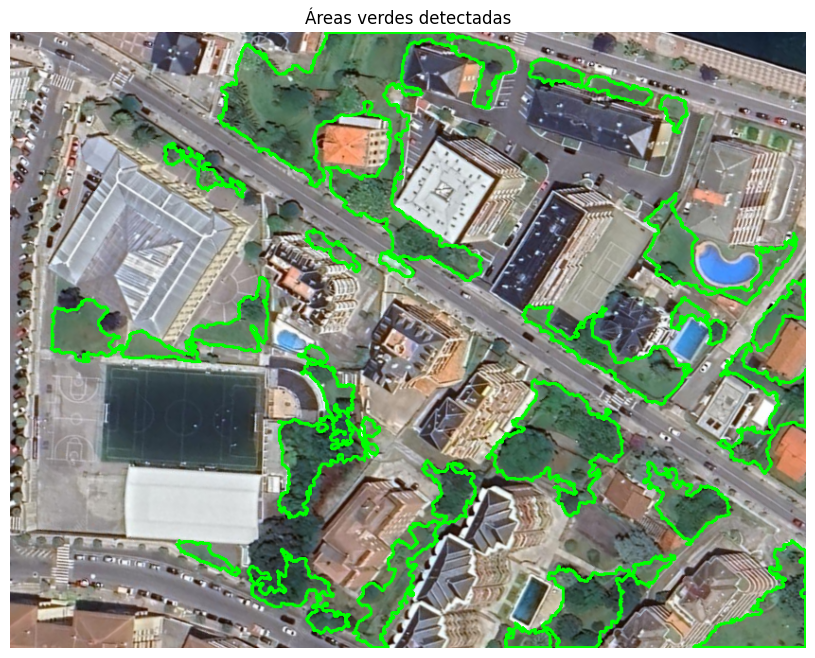

In [9]:
import cv2
import numpy as np
# Cargar la imagen satelital nuevamente
image_path = 'Ataulfo.png'
image = cv2.imread(image_path)

# Convertir la imagen a espacio de color HSV para trabajar con los tonos verdes
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir los límites para el color verde típico (puede ajustarse según la imagen)
lower_green = np.array([36, 25, 25])  # Tonos verdes bajos en HSV
upper_green = np.array([86, 255, 255])  # Tonos verdes altos en HSV

# Crear una máscara para resaltar las áreas verdes
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Aplicar la máscara a la imagen original para aislar las áreas verdes
isolated_green = cv2.bitwise_and(image, image, mask=green_mask)

# Detectar contornos en la máscara
contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por tamaño para evitar ruido (ajustar valores según sea necesario)
filtered_contours = [c for c in contours if 500 < cv2.contourArea(c) < 50000]

# Dibujar los contornos filtrados en la imagen original
output_image = image.copy()
cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)

# Mostrar las áreas verdes detectadas en la imagen
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Áreas verdes detectadas")
plt.axis("off")
plt.show()



# 9 Uso de OpenCV para Contar Piscinas

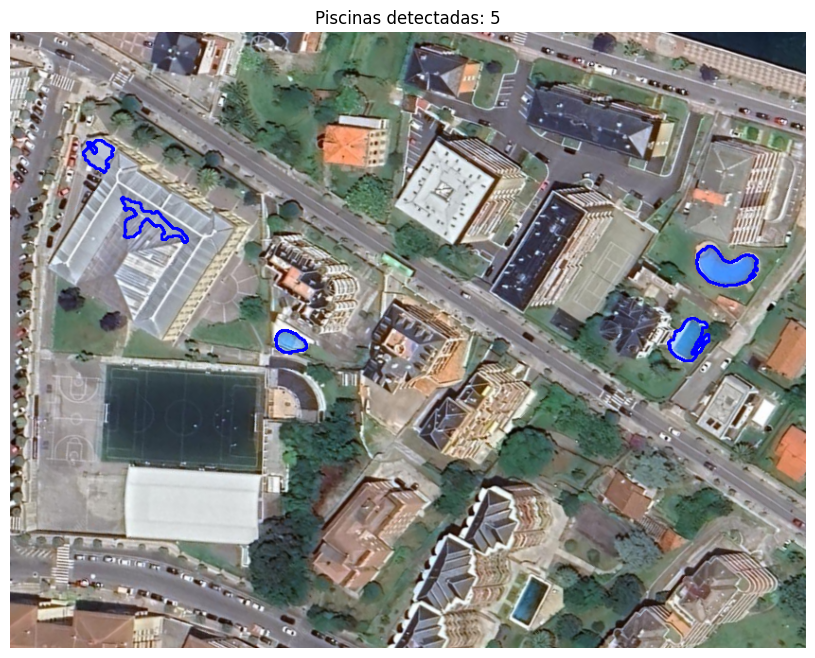

5

In [10]:

# Ajustar límites de color azul para las piscinas
lower_blue_new = np.array([50, 30, 150])  # Rango inferior ajustado para azul claro
upper_blue_new = np.array([135, 255, 255])  # Rango superior ajustado

# Crear una máscara para resaltar las áreas azules
blurred = cv2.GaussianBlur(hsv_image, (5, 5), 0)
blue_mask = cv2.inRange(blurred, lower_blue_new, upper_blue_new)

# Aplicar la máscara a la imagen original para aislar las piscinas
isolated_blue = cv2.bitwise_and(image, image, mask=blue_mask)

# Detectar contornos en la máscara
contours_blue, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por tamaño para identificar piscinas
filtered_contours_pools = [c for c in contours_blue if 500 < cv2.contourArea(c) < 5000]

# Dibujar los contornos filtrados en la imagen original
output_image_pools = image.copy()
cv2.drawContours(output_image_pools, filtered_contours_pools, -1, (255, 0, 0), 2)

# Contar el número de piscinas detectadas
num_pools = len(filtered_contours_pools)

# Mostrar la imagen con las piscinas detectadas
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_image_pools, cv2.COLOR_BGR2RGB))
plt.title(f"Piscinas detectadas: {num_pools}")
plt.axis("off")
plt.show()

num_pools
